<h1> Final Project : CelebVoice, Celebrity Speech Recognition

<img src='retro-radio-microphone-against-purple-background.jpg'>

Photo by <a href="https://burst.shopify.com/@lightleaksin?utm_campaign=photo_credit&amp;utm_content=Browse+Free+HD+Images+of+Retro+Radio+Microphone+Against+Purple+Background&amp;utm_medium=referral&amp;utm_source=credit">Samantha Hurley</a> from <a href="https://burst.shopify.com/vintage?utm_campaign=photo_credit&amp;utm_content=Browse+Free+HD+Images+of+Retro+Radio+Microphone+Against+Purple+Background&amp;utm_medium=referral&amp;utm_source=credit">Burst</a>

<h2> Objectives 🚀

Recognize celebrity speakers from any speech :
[Project Plan](https://docs.google.com/presentation/d/16wNe2B3FZuiwzTYpEq4Us9K1lSrWAeuP5wIO_sBCzRY/edit?usp=sharing)

I choose this project because I am fascinated by audio synthesis and I decide to study voice recognition part to begin.
   
*Source : Extract from The VoxCeleb Speaker Recognition Challenge (VoxSRC - University of Oxford) :* [VoxCeleb Speaker Recognition Challenge (VoxSRC)](http://www.robots.ox.ac.uk/~vgg/data/voxceleb/competition.html)

<h2> Prerequisites

- I crate a virtual environment for my project to can export it later and avoid versioning issue. I install different packages with `pip install -r requirements.txt` command : 

In [3]:
!ls

Final-Project.ipynb  requirements.txt  venv/


In [1]:
!cat requirements.txt

Python==3.7.4
Pandas==1.0.0
Numpy==1.17.2
Scipy==1.3.1
Scikit-learn==0.21.3
Librosa==0.7.2
Matplotlib==3.1.1
Seaborn==0.10.0
Pyaudio==0.2.11


- I install LibROSA library, a python package for music and audio analysis : [LibROSA - librosa 0.7.2 documentation](https://librosa.github.io/librosa/)

- I install pyAudio library to play and record audio : [PyAudio - documentation](https://people.csail.mit.edu/hubert/pyaudio/docs/)

- I read documentation on voiceprint to can identify each celebrity voice and audio signal processing :

1.  [*From Natural to Artificial Intelligence - Algorithms and Applications* : Some Commonly Used Speech Feature Extraction Algorithms (book extract)](https://www.intechopen.com/books/from-natural-to-artificial-intelligence-algorithms-and-applications/some-commonly-used-speech-feature-extraction-algorithms)

2. [Deep Learning course : keywords voice recognition](https://deeplylearning.fr/cours-pratiques-deep-learning/reconnaissance-vocale-de-mots-cles/)

3. [Voice Gender Identification project](https://maelfabien.github.io/machinelearning/Speech11/#)

4. [Voice Classification with Neural Networks project](https://towardsdatascience.com/voice-classification-with-neural-networks-ff90f94358ec)

http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/


https://medium.com/@jonathan_hui/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9

<h2> Import

I import all my needed librairies here and I report them for each chapter :

In [2]:
#System library
import sys, os

#I use a virtual environment for my project : venv
sys.path.append('/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020/venv/lib/python3.7/site-packages')

#Data Manipulation
import pandas as pd, numpy as np

#Feature extraction
import librosa               #Audio library

#To play audio
#import pyaudio

#Data Storage
import pickle

#Data visualization
import matplotlib.pyplot as plt, seaborn as sns
import librosa.display

<h2> Dataset

All important files used for my project saved here [Final Project data](https://drive.google.com/drive/u/0/folders/1qvcWw5RyMjSaWA3ft_THVjGptLy_09Rt)

📥 I dowload the VoxCeleb1 dataset on : [VoxCeleb : A large scale audio-visual dataset of human speech](http://www.robots.ox.ac.uk/~vgg/data/voxceleb/index.html#portfolio) :

- I am limited to use the VoxCeleb1 dataset because is lower than which give by the VoxSRC Challenge and my CPU will support it.
- It contains 145 261 audio files (format : wav - duration : 5s in average) extracted from YouTube videos of celebrity interviews : 1251 celebrity speakers
- My data is labelised : Using Supervised Machine Learning Model
- My targets are discrete values : I am in Classification case and I use Deep Learning model

`vox1_meta.csv` contains metadata for all the speakers in the dataset : full names, nationality and gender labels. I explore this file to have more informations on my dataset :

In [5]:
# I verify my path
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


I define my file path to import `vox1_meta.csv` in a dataframe named `celebrity_speakers_data` :

In [7]:
filepath = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_meta.csv')

In [8]:
filepath

'../../../../Documents/Final-Project-data/vox1_meta.csv'

In [9]:
celebrity_speakers_data = pd.read_csv(filepath, delim_whitespace=True)

<h3> 1. Celebrity speakers : Data Exploration

My dataframe has 1251 rows corresponding to number of celebrity speakers interviewed and 5 columns corresponding to :

1. `VoxCeleb1_ID` : celebrity speakers ID
2. `VGGFace1_ID` : celebrity speakers names
3. `Gender` : celebrity speakers gender
4. `Nationality` : celebrity speakers nationality
5. `Set` : if celebrity will use for train (development) or test model part

In [11]:
celebrity_speakers_data.shape

(1251, 5)

In [12]:
celebrity_speakers_data.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
0,id10001,A.J._Buckley,m,Ireland,dev
1,id10002,A.R._Rahman,m,India,dev
2,id10003,Aamir_Khan,m,India,dev
3,id10004,Aaron_Tveit,m,USA,dev
4,id10005,Aaron_Yoo,m,USA,dev


All my dataframe is string type and it seems there aren't `NAN` values :

In [11]:
celebrity_speakers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 5 columns):
VoxCeleb1_ID    1251 non-null object
VGGFace1_ID     1251 non-null object
Gender          1251 non-null object
Nationality     1251 non-null object
Set             1251 non-null object
dtypes: object(5)
memory usage: 49.0+ KB


<h3> 2. Celebrity speakers : Data Cleaning

I verify again if there aren't `NAN` values to can exploit and visualize my data :

In [12]:
celebrity_speakers_data.isna().sum()

VoxCeleb1_ID    0
VGGFace1_ID     0
Gender          0
Nationality     0
Set             0
dtype: int64

I control duplicates :

In [13]:
celebrity_speakers_data.duplicated().sum()

0

My data is cleaned but I have to change my columns because I need numerical values to plot data :

In [14]:
celebrity_speakers_data.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
0,id10001,A.J._Buckley,m,Ireland,dev
1,id10002,A.R._Rahman,m,India,dev
2,id10003,Aamir_Khan,m,India,dev
3,id10004,Aaron_Tveit,m,USA,dev
4,id10005,Aaron_Yoo,m,USA,dev


<h3> 3. Celebrity speakers : Data Analysis

I plot dataset repartition between development and test :

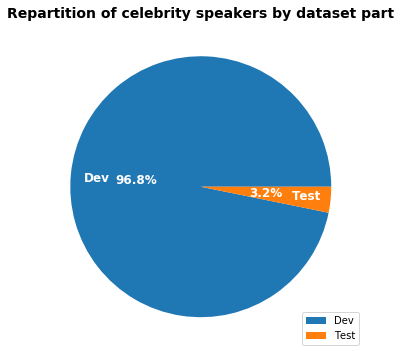

In [12]:
plt.figure(figsize=(8,6))

textprops={'color': 'w', 'size': 12, 'weight': 'bold'}             #Text property
labels = ['Dev', 'Test']                                           #Dataset part label

plt.pie(x=celebrity_speakers_data['Set'].value_counts(),
        labels=labels,
        autopct='%1.1f%%',                                         #Labels proportion
        pctdistance=.5, 
        labeldistance=.7, 
        textprops=textprops)                                       #Text property

plt.title('Repartition of celebrity speakers by dataset part',     #Diagram title
          fontdict={'size': 14, 'fontweight': 'bold'})

plt.legend(loc='lower right')                                      #Legend location

plt.show()

I use `get_dummies` function to transform my different values into numerical values :

In [13]:
celebrity_speakers_data['Gender'].value_counts()

m    690
f    561
Name: Gender, dtype: int64

In [10]:
celebrity_speakers_data['Gender'] = pd.get_dummies(celebrity_speakers_data['Gender'], prefix='Gender', drop_first=True)

For the column `Gender` : 1 corresponding to male gender and 0 is for female gender

In [11]:
celebrity_speakers_data.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
0,id10001,A.J._Buckley,1,Ireland,dev
1,id10002,A.R._Rahman,1,India,dev
2,id10003,Aamir_Khan,1,India,dev
3,id10004,Aaron_Tveit,1,USA,dev
4,id10005,Aaron_Yoo,1,USA,dev


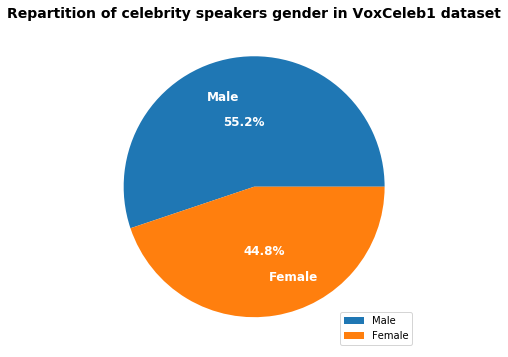

In [19]:
plt.figure(figsize=(8,6))

textprops={'color': 'w', 'size': 12, 'weight': 'bold'}                      #Text property
labels = ['Male', 'Female']                                                 #Gender labels

plt.pie(x=celebrity_speakers_data['Gender'].value_counts(), 
        labels=labels, 
        autopct='%1.1f%%',                                                  #Labels proportion
        pctdistance=.5, 
        labeldistance=.7, 
        textprops=textprops)                                                #Text property

plt.title('Repartition of celebrity speakers gender in VoxCeleb1 dataset',  #Diagram title
          fontdict={'size': 14, 'fontweight' : 'bold'})  

plt.legend(loc='lower right')                                               #Legend location

plt.show()

There is more and less the same gender repartition for celebrity speakers.

I plot nationality repartition for celebrity speakers : American and Englishman are majority.

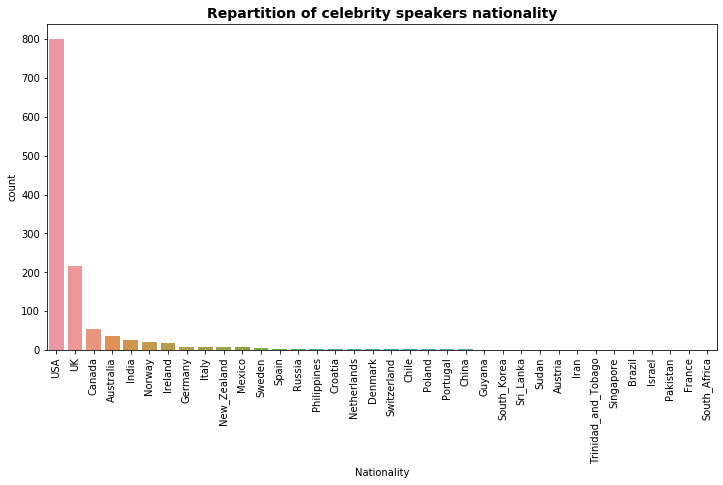

In [20]:
plt.figure(figsize=(12, 6))

plt.title('Repartition of celebrity speakers nationality', fontweight="bold", size=14)  #Diagram title

sns.countplot(x='Nationality',
              data=celebrity_speakers_data,
              order=celebrity_speakers_data['Nationality'].value_counts().index)

plt.xticks(rotation=90)                                                                 #abscissa label positioning

plt.show()

I choose American and Englishman speakers to train my model and reduce time calculation : 1014 celebrity speakers is selected :

In [12]:
celebrity_speakers_data_limited = celebrity_speakers_data.loc[(celebrity_speakers_data['Nationality'] == 'USA') | (celebrity_speakers_data['Nationality'] == 'UK')]
celebrity_speakers_data_limited.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
3,id10004,Aaron_Tveit,1,USA,dev
4,id10005,Aaron_Yoo,1,USA,dev
6,id10007,Abigail_Breslin,0,USA,dev
7,id10008,Abigail_Spencer,0,USA,dev
9,id10010,Adam_Brody,1,USA,dev


In [13]:
celebrity_speakers_data_limited.shape

(1014, 5)

I use `get_dummies` function to transform `Nationality` column into numerical values : 1 for American and 0 for Englishman :

In [14]:
celebrity_speakers_data_limited['Nationality'] = pd.get_dummies(celebrity_speakers_data_limited['Nationality'], drop_first=True, prefix='Nationality')

/home/jlenclume/bin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
celebrity_speakers_data_limited.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
3,id10004,Aaron_Tveit,1,1,dev
4,id10005,Aaron_Yoo,1,1,dev
6,id10007,Abigail_Breslin,0,1,dev
7,id10008,Abigail_Spencer,0,1,dev
9,id10010,Adam_Brody,1,1,dev


In [16]:
celebrity_speakers_data_limited['Nationality'].value_counts()

1    799
0    215
Name: Nationality, dtype: int64

<h3> 4. Celebrity speakers : saving data

I save my `celebrity_speakers_data_limited` dataframe in a pickle file `celebrity_speakers_data_limited.pkl` to can use it later. It is the same method with `celebrity_speakers_data.pkl`:

In [27]:
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


In [18]:
filepath_celebrity_data_limited = os.path.join('final-project-data', 'celebrity_speakers_data_limited.pkl')

with open(filepath_celebrity_data_limited, 'wb') as f:
    pickle.dump(celebrity_speakers_data_limited, f)

In [21]:
filepath_celebrity_data = os.path.join('final-project-data', 'celebrity_speakers_data.pkl')

with open(filepath_celebrity_data, 'wb') as f:
    pickle.dump(celebrity_speakers_data, f)

In [19]:
!ls final-project-data

audio_loaded.pkl		     celebrity_speakers_data.pkl
celebrity_speakers_data_limited.pkl  requirements.txt


<h2> 1. Audio files Analysis

<h3> 1.1 Data Comprehension

I import `celebrity_speakers_data.pkl` and `celebrity_speakers_data_limited.pkl` to use dataframe :

In [2]:
filepath_celebrity_data_limited = os.path.join('final-project-data', 'celebrity_speakers_data_limited.pkl')

with open(filepath_celebrity_data_limited, 'rb') as f:
    celebrity_speakers_data_limited = pickle.load(f)

In [24]:
celebrity_speakers_data_limited.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
3,id10004,Aaron_Tveit,1,1,dev
4,id10005,Aaron_Yoo,1,1,dev
6,id10007,Abigail_Breslin,0,1,dev
7,id10008,Abigail_Spencer,0,1,dev
9,id10010,Adam_Brody,1,1,dev


In [3]:
filepath_celebrity_data = os.path.join('final-project-data', 'celebrity_speakers_data.pkl')

with open(filepath_celebrity_data, 'rb') as f:
    celebrity_speakers_data = pickle.load(f)

In [27]:
celebrity_speakers_data.head()

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
0,id10001,A.J._Buckley,1,Ireland,dev
1,id10002,A.R._Rahman,1,India,dev
2,id10003,Aamir_Khan,1,India,dev
3,id10004,Aaron_Tveit,1,USA,dev
4,id10005,Aaron_Yoo,1,USA,dev


Now, I explore my audio files dataset :

In [35]:
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


In [37]:
!ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav

id10001  id10136  id10311  id10446  id10581  id10716  id10851  id10986	id11121
id10002  id10137  id10312  id10447  id10582  id10717  id10852  id10987	id11122
id10003  id10138  id10313  id10448  id10583  id10718  id10853  id10988	id11123
id10004  id10139  id10314  id10449  id10584  id10719  id10854  id10989	id11124
id10005  id10140  id10315  id10450  id10585  id10720  id10855  id10990	id11125
id10006  id10141  id10316  id10451  id10586  id10721  id10856  id10991	id11126
id10007  id10142  id10317  id10452  id10587  id10722  id10857  id10992	id11127
id10008  id10143  id10318  id10453  id10588  id10723  id10858  id10993	id11128
id10009  id10144  id10319  id10454  id10589  id10724  id10859  id10994	id11129
id10010  id10145  id10320  id10455  id10590  id10725  id10860  id10995	id11130
id10011  id10146  id10321  id10456  id10591  id10726  id10861  id10996	id11131
id10012  id10147  id10322  id10457  id10592  id10727  id10862  id10997	id11132
id10013  id10148  id10323  id10458  id10593  id10728

In [ ]:
!ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav

For example, I choose two celebrity ID : id10965 corresponds to Regina_Hall and id11109	corresponds to Stephen Baldwin.

In [38]:
!ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/id10965

0AdxTgLLbFY/  avNaBy3u3Ow/  JRXA-X2K5zc/  pGMcglQYXYE/  zZ2uBOISm5Q/
4GbjXgL5-yQ/  CYf4vAgT_iQ/  koRHZBBT_VI/  QXWsnscCJLI/
9-XitQATNL8/  GH0kJfikbOU/  OHDRhzSfICk/  TKek4WAhbSE/
AuYQOAiIzk0/  IXwnjoHthfA/  OJIfvnH1ymk/  Xo0b4f0UVEA/


In [39]:
celebrity_speakers_data_limited.loc[celebrity_speakers_data_limited['VoxCeleb1_ID'] == 'id10965']

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
964,id10965,Regina_Hall,0,1,dev


In [40]:
ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/id10965/0AdxTgLLbFY

00001.wav


In [44]:
celebrity_speakers_data_limited.loc[celebrity_speakers_data_limited['VoxCeleb1_ID'] == 'id11109']

,VoxCeleb1_ID,VGGFace1_ID,Gender,Nationality,Set
1108,id11109,Stephen_Baldwin,1,1,dev


In [41]:
ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/id11109/410TXiXAVeU

00001.wav  00002.wav  00003.wav


I observe that there are several audios for each speaker in folders. I would like to add audio files in my dataframe to can exploit them later so I create a bash script `move_audio_files.sh` to gather and rename audio files with the following format `celebrity_ID-Interview_ID-audio_part_number`:

In [46]:
!pwd

/home/jlenclume/code/Jennifer974/my_projects/final-project-vivadata-03-2020


In [157]:
!cat move_audio_files.sh

#!/bin/bash
for celeb_id in `ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav`
do
	for lst_audio in `ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/$celeb_id`
	do
		for audio in  `ls ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/$celeb_id/$lst_audio`
		do
			cp ../../../../Documents/Final-Project-data/vox1_dev_wav/wav/$celeb_id/$lst_audio/$audio ../../../../Documents/Final-Project-data/vox1_dev_wav/audio_files/$celeb_id-$lst_audio-$audio		
		done


	done
done


In [19]:
filepath_audio_files = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_dev_wav', 'audio_files')

In [20]:
audio_names = os.listdir(filepath_audio_files)

#Total number of celebrity speakers audios
len(audio_names)        

148642

My dataset contains 148 642 audios : I reduce the size of my dataset thank to previously study (Nationality selection : USA and UK) : 

In [21]:
list_audio = []
list_celeb_id = []

for audio_name in audio_names:
    for celeb_id in celebrity_speakers_data_limited['VoxCeleb1_ID']:
        
        #I compare celebrity ID in audio name : celebrity_ID-Interview_ID-audio_part_number
        if celeb_id == audio_name.split('-')[0]:
            
            #I add audio files corresponding to my selection in an empty list
            list_audio.append(audio_name)

len(list_audio)

119045

I decide to keep 10 000 audios to can fit Machine Learning models in my computer.

In [22]:
list_audio = list_audio[:10000]

len(list_audio)

10000

In [23]:
#list comprehension to retrieve celeb_id corresponding to audio name
celeb_id = [audio_name.split('-')[0] for audio_name in list_audio]

len(celeb_id)

10000

My dataset contains 981 celebrity speakers : it's my labels :

In [35]:
len(set(celeb_id))

981

I save audio informations in a pickle file `audio_informations.pkl`:

In [26]:
filepath_audio_informations = os.path.join('final-project-data', 'audio_informations.pkl')

with open(filepath_audio_informations, 'wb') as f:
    pickle.dump((audio_names, list_audio, celeb_id), f)

I play a record with the following function with Pyaudio library : `play_audio`

In [ ]:
def play_audio(audio_name):
    '''
    This function collects each audio and extracts Mel-frequency cepstral coefficients (MFCCs) with librosa library
    
    Parameters
    ------------
    audio_name : str
        contains an audio file name
    
    Returns
    ------------

    '''
    filepath_audio_files = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_dev_wav', 'audio_files', audio_name)
    
    # instantiate PyAudio 
    audio_play = pyaudio.PyAudio()
    

Some audios contains background noise, laughter, and other artefacts in a range of recording environments : an audio signal processing is needed.


<h3> 1.2 Dataset building : Features Extraction

After my research, sound is a signal distinctive by several features as :
- frequency : the rate at which something occurs over a particular period of time or in a given sample.
- energy : the energy of a signal is the total magnitude of the signal
- tempo : the speed at which a passage of music is or should be played.
- spectrum :  usually a short sample of a sound – in terms of the amount of vibration at each individual frequency
- spectrogram : is a visual representation of the spectrum of frequencies of a signal as it varies with time.
- ...

My approach consists of using Deep Learning Model : Convolutional Neural Networks (CNN). I transform my audio in images to can use it so I decide to use Mel-frequency cepstral coefficients (MFCC) spectrogram (a visual representation of sound) because is the state-of-the-art features for speaker identification, speech recognition... 

<h5> Mel-frequency cepstral coefficients (MFCC) :

*MFCC computation is based on the ear’s working principle : the human is considered as a speaker identifier.*

Firstly, I don't do any audio signal processing.

In [7]:
filepath_audio_informations = os.path.join('final-project-data', 'audio_informations.pkl')

with open(filepath_audio_informations, 'rb') as f:
    audio_names, list_audio, celeb_id = pickle.load(f)

I use LibROSA library to compute MFCCs on my records :

In [5]:
def get_mfcc(list_audio, n_mfcc=40):
    '''
    This function collects each audio and extracts Mel-frequency cepstral coefficients (MFCCs) with librosa library
    
    Parameters
    ------------
    list_audio : list of str
        contains audio files names
    n_mfcc : int > 0
        number of MFCCs to return
    
    Returns
    ------------
    list_mfcc : list of array
        contains Mel-frequency cepstral coefficients (MFCCs) sequence for each audios
    list_source : list of int
        sampling rate
    '''
    list_mfcc = []
    list_audio_source = []
    
    filepath_audio_files = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_dev_wav', 'audio_files')
    
    for audio_name in list_audio:
        #Audio filepath
        filepath_audio = os.path.join(filepath_audio_files, audio_name)

        #Load audio files
        # I choose duration=5s for each audio to have the same audio duration
        #sr=None : preserves the native sampling rate of the file 
        audio, source = librosa.load(filepath_audio, duration=5, sr=None) 
        
        #List of Mel-frequency cepstral coefficients (MFCCs) computed
        list_mfcc.append(librosa.feature.mfcc(audio, n_mfcc=n_mfcc, sr=source))

        #list of source loaded
        list_audio_source.append(source)
                
    return list_mfcc, list_audio_source

In [6]:
mfccs, audio_source = get_mfcc(list_audio)

In [7]:
set(audio_source)

{16000}

I save `mfccs` and `audio_source` to a local folder :

In [10]:
filepath_audio_loaded = os.path.join('final-project-data', 'audio_mfcc.pkl') 

with open(filepath_audio_loaded, 'wb')as f:
    pickle.dump((mfccs, audio_source), f)

In [11]:
ls final-project-data

audio_informations.pkl  celebrity_speakers_data_limited.pkl  mfcc_images/
audio_mfcc.pkl          celebrity_speakers_data.pkl


In [6]:
filepath_audio_loaded = os.path.join('final-project-data', 'audio_mfcc.pkl') 

with open(filepath_audio_loaded, 'rb')as f:
    mfccs, audio_source = pickle.load(f)

For example, I display speech waveform and MFCC spectrogram for two records :

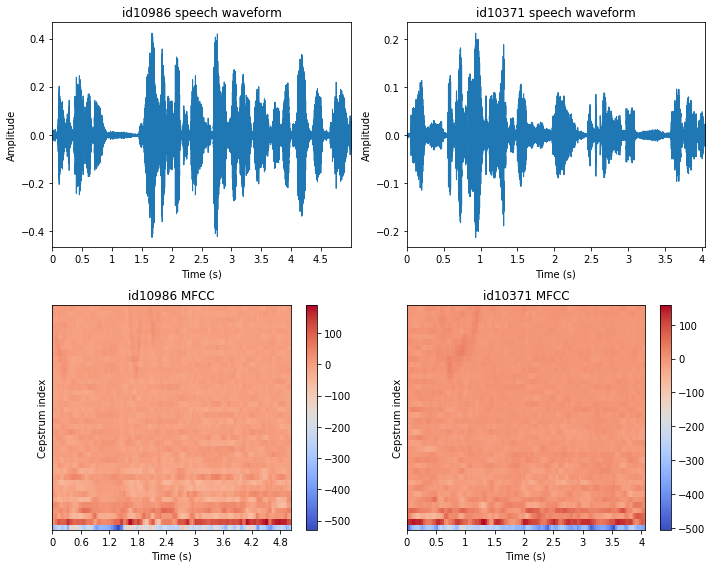

In [6]:
plt.figure(figsize=(10, 8))

idx_1 = np.random.randint(len(mfccs))                                      #random index choose for a record
idx_2 = np.random.randint(len(mfccs))                                      #random index choose for a record

#Waveplot for idx_1
plt.subplot(2, 2, 1)
filepath_audio_files_1 = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_dev_wav', 'audio_files', list_audio[idx_1])
audio_1 = librosa.load(filepath_audio_files_1, duration=5, sr=None)[0]     #Audio loaded
librosa.display.waveplot(audio_1, sr=16000)                                #Waveplot displayed
plt.title(f'{celeb_id[idx_1]} speech waveform')                            #Waveplot title
plt.xlabel('Time (s)')                                                     #Axis label
plt.ylabel('Amplitude')                                                    #Axis label
plt.tight_layout()                                                         #Space between two plots

#Waveplot for idx_2
plt.subplot(2, 2, 2)
filepath_audio_files_2 = os.path.join('..', '..', '..', '..', 'Documents', 'Final-Project-data', 'vox1_dev_wav', 'audio_files', list_audio[idx_2])
audio_2 = librosa.load(filepath_audio_files_2, duration=5, sr=None)[0]     #Audio loaded
librosa.display.waveplot(audio_2, sr=16000)                                #Waveplot displayed
plt.title(f'{celeb_id[idx_2]} speech waveform')                            #Waveplot title
plt.xlabel('Time (s)')                                                     #Axis label
plt.ylabel('Amplitude')                                                    #Axis label
plt.tight_layout()                                                         #Space between two plots

#MFCC spectrogram for idx_1 
plt.subplot(2, 2, 3)
librosa.display.specshow(mfccs[idx_1], x_axis='time', sr=16000)            #MFCC spectrogram displayed
plt.colorbar()                                                             #Color legend
plt.xlabel('Time (s)')                                                     #Axis label
plt.ylabel('Cepstrum index')                                               #Axis label
plt.title(f'{celeb_id[idx_1]} MFCC')                                       #MFCC spectrogram title
plt.tight_layout()                                                         #Space between two plots

#MFCC spectrogram for idx_2
plt.subplot(2, 2, 4)
librosa.display.specshow(mfccs[idx_2], x_axis='time', sr=16000)            #MFCC spectrogram displayed
plt.colorbar()                                                             #Color legend
plt.xlabel('Time (s)')                                                     #Axis label
plt.ylabel('Cepstrum index')                                               #Axis label
plt.title(f'{celeb_id[idx_2]} MFCC')                                       #MFCC spectrogram title
plt.tight_layout()                                                         #Space between two plots


plt.show()

To use CNN model, I save my mfcc spectrograms displayed in a local folder :

In [16]:
def save_mfcc_image(mfccs, list_audio):
    '''This function saves mfcc spectrograms in png format in a local folder
    
    Parameters
    ------------
    mfccs : list of array
        contains Mel-frequency cepstral coefficients (MFCCs) sequence for each audios
    list_audio : list of str
        contains audio files names
    
    
    Returns
    -----------
    os.listdir : list of str
        list of mfcc spectrogram saved in local folder : png format
    
    ''' 
    filepath_img_folder = os.path.join('final-project-data', 'mfcc_images')
    
    for idx in range(len(mfccs)):
        filepath_img = os.path.join(filepath_img_folder, list_audio[idx][:-4])
        
        #MFCC spectrogram displayed
        img = librosa.display.specshow(mfccs[idx], sr=16000)         
        
        #MFCC spectrogram saved
        plt.savefig(filepath_img)                                    
    
    print('MFCC spectrogram is saving : ')
    return os.listdir(filepath_img_folder)

In [9]:
len(list_audio)

10000

In [ ]:
list_images = save_mfcc_image(mfccs, list_audio[9735:])

In [4]:
filepath_img_folder = os.path.join('final-project-data', 'mfcc_images')
list_images = os.listdir(filepath_img_folder)

In [9]:
list_images[:10]

['id10639-U0iFN1R6MN4-00001.png',
 'id10542-G6DLk7pmIZQ-00010.png',
 'id10869-EhuDKMbSmMM-00001.png',
 'id10997-Ta2h-xTptPE-00019.png',
 'id10523-ZDoBIBvmo5A-00002.png',
 'id11046-7BcUpVPxYs8-00003.png',
 'id11147-gBDSUfr-mkw-00002.png',
 'id10915-y_DxEsYv6TE-00004.png',
 'id10353-jZMAFkAwedU-00008.png',
 'id10471-KAnnsNGPEJs-00007.png']

I define a new function `load_mfcc_images` :

In [5]:
def load_mfcc_image(list_image):
    '''This function load mfcc spectrograms images into an array
    
    Parameters
    ------------
    list_image : list of str
        contains images names to load
    
    Returns
    ------------
    images_loaded : list of array
        list of images imported from a file into an array.
    
    ''' 
    images_read = np.array([])
    
    filepath_img_folder = os.path.join('final-project-data', 'mfcc_images')
    
    #List comprehension to add each array of image loaded
    #return [plt.imread(os.path.join(filepath_img_folder, list_image[idx])) for idx in range(list_image)]
    
    for idx in range(len(list_image)):
        filepath_img = os.path.join(filepath_img_folder, list_image[idx])
        
        #Load mfcc images
        images_read = np.append(images_read, plt.imread(filepath_img))
        
    return images_read

In [ ]:
mfcc_image = load_mfcc_image(list_images)

In [32]:
mfcc_image

array([], dtype=float64)